In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys
from tqdm import tqdm
from scipy.stats import norm, poisson
from scipy.integrate import simps

In [2]:
root_dir = abspath(join(pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

In [5]:
style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
spectral_dir = join(root_data_dir, "Spectral-Class-Cluster-metal")
eff_dir = join(root_data_dir, "Effective-Volume-metal")

In [7]:
df_comp = vaex.open(join(eff_dir, "effective-volume-completeness.hdf5"))
df_comp

#,z,0,1,2,3,4,5,6,7,8
0,-399.19839679358716,0.27392152039160855,0.404410791208261,0.5170575740239737,0.5766698233066891,0.5699685205029045,0.5524547447275979,0.5431248469274317,0.534625819346767,0.526248795447997
1,-397.59519038076155,0.2738076151759549,0.4043881385628134,0.5172486415498765,0.5768658532595403,0.5701335719537954,0.5525870432954947,0.5433768209118337,0.5350240741014117,0.5264923082656909
2,-395.9919839679359,0.2736943284383685,0.40436450393378015,0.5174385799210681,0.5770608102452867,0.5702979251721843,0.5527189153521701,0.543629741980162,0.5354248932074908,0.5267372545093724
3,-394.3887775551102,0.2735814382223475,0.40434008079383876,0.5176277811729176,0.5772550780924424,0.5704618592100081,0.5528505559390327,0.5438836032642261,0.5358280362670043,0.5269835161203756
4,-392.78557114228454,0.2734682095481665,0.40431551633766577,0.5178175440212972,0.5774499278492822,0.5706262969401932,0.5529826091839549,0.5441383683274869,0.5362326792772402,0.527230685864816
...,...,...,...,...,...,...,...,...,...,...
494,392.7855711422846,0.2734682095481665,0.40431551633766577,0.5178175440212972,0.5774499278492822,0.5706262969401932,0.5529826091839549,0.5441383683274869,0.5362326792772402,0.527230685864816
495,394.38877755511027,0.2735814382223475,0.40434008079383876,0.5176277811729176,0.5772550780924424,0.5704618592100081,0.5528505559390327,0.5438836032642261,0.5358280362670043,0.5269835161203756
496,395.99198396793594,0.2736943284383685,0.40436450393378015,0.5174385799210681,0.5770608102452867,0.5702979251721843,0.5527189153521701,0.543629741980162,0.5354248932074908,0.5267372545093724
497,397.59519038076155,0.2738076151759549,0.4043881385628134,0.5172486415498765,0.5768658532595403,0.5701335719537954,0.5525870432954947,0.5433768209118337,0.5350240741014117,0.5264923082656909


In [8]:
name = "Vertical-Number-metal"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Vertical-Number-metal already exist. Good to go!


In [9]:
spec_files = glob(join(spectral_dir, "*.hdf5"))
spec_files.sort()
spec_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(-0.10)_(0.13).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.13)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.19)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.27)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.33)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.36)_(0.38).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.38)_(0.40).hdf5']

In [10]:
gaia = vaex.open(spec_files[0])
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.014884639099905679,-0.6277107372592441,8.755000114440918,8.656999588012695,AAA,2309518882743792512,23.22193717956543,22.29106181287425,0.015476686879992485,6.508986172951364,0.016319049522280693,4.789413549620276,0.020170677453279495,9.131726264953613,9.230249404907227,8.934432983398438,1889.544189453125,2443.355224609375,1.1517304182052612,1.167120337486267,2.951179464847555,-1.3351842543237686,208.5220947265625,204.33360290527344,210.59359741210938,0.003100000089034438,0.0010000000474974513,0.00570000009611249,nan,nan,nan,A,--,13.979635238647461,gaia,0.8730981349945068,0.8730981349945068,1.0,7851.72216796875,gspphot,7.68994140625,6.4814453125,0.0,4.14709997177124,gspphot,0.008999824523925781,0.014599800109863281,0.0,nan,--,nan,nan,nan,-1.2071000337600708,gspphot,0.004799962043762207,0.006800055503845215,0.0,0.12999999523162842,rave,nan,nan,-1.0,nan,--,nan,nan,nan,0.09800052642822266,2.1564118070290146,208.79383031755194,-203.02519970723176,48.7404540655227,-8.415224816113692,-21.64352857182297,0.016011703235616633,0.015794447555597668,-21.420227000145907,-8.328402885890153,-0.09155582963669412,-0.038488697266941825,-18.593699921256633,0.8730981349945068,0.8492448485468144,-17.56504054597298,0.22240955574805651,15.671299950086627,0.21851120838760413,11.50231723983446,0.056570682463120345,0.656183260425856,2.2724350893667364
1,0.008917061681364228,-0.048279332675252175,6.333000183105469,6.209000110626221,AAA,2448569690198755840,38.3818473815918,38.23798058974192,0.03215809911489487,-3.320105645310672,0.02077770233154297,15.648562219917743,0.03183779865503311,6.871397018432617,7.007111549377441,6.608101844787598,716.1038818359375,1091.4459228515625,1.0634098052978516,1.1764565706253052,-1.4844818198754623,-1.0982041189149518,63.59870147705078,62.819698333740234,63.837398529052734,0.00039999998989515007,0.0,0.001500000013038516,nan,nan,nan,A,--,9.158726692199707,gaia,0.3001042306423187,0.3001042306423187,1.0,7234.37060546875,gspphot,3.57373046875,3.30517578125,0.0,4.155799865722656,gspphot,0.003200054168701172,0.00820016860961914,0.0,nan,--,nan,nan,nan,-1.3895000219345093,gspphot,0.062399983406066895,0.07220005989074707,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.12400007247924805,2.305372388159757,63.90363446471675,-56.8992413574995,29.08867186279142,33.346648213326496,-19.00440249032187,0.030476525523901784,0.023174072685925768,-5.756494848419319,10.100807365547125,-0.013654361742468372,0.02252880254356858,-10.775183541282718,0.3001042306423187,0.2672824782536821,-0.9565182768560057,0.13714615438495595,-10.145663157583355,0.025368455825438258,-0.08219332519347466,0.13664939098167272,0.7641710959654313,2.3284855063378016
2,0.017169798689541858,0.2509584496833118,6.4629998207092285,6.3420000076293945,AAA,2768911028561373184,82.73104095458984,79.9700922599516,0.03658584877848625,-21.1945508376773,0.032072752714157104,12.846665601946027,0.030333148315548897,7.028295993804932,7.170999526977539,6.754446983337402,1664.38427734375,2524.64306640625,1.1126266717910767,1.177590012550354,-1.2921946921475476,-0.8189414254694577,77.58290100097656,77.27890014648438,77.88099670410156,0.005400000140070915,0.001500000013038516,0.016599999740719795,nan,nan,nan,F,--,-5.97739839553833,gaia,0.1642320305109024,0.16423203

# Constant Volume Prior

Assume the parallax has normal distribution with mean $\mu_\varpi$ and standard deviation $\sigma_\varpi$.
\begin{align*}
 p(\varpi|\mu_\varpi, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-\mu_\varpi)^2}{2\sigma_\varpi^2}\right)
\end{align*}

And $\mu_\varpi$ is the true parallax. We have relation between distance and parallax, $\varpi = 1/r$.

\begin{align*}
 p(\varpi|r, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

We want to infer the real parallax or the real distance, so using Bayes' theorem, we have
\begin{align*}
    p(r|\varpi, \sigma_\varpi) = \frac{p(\varpi|r, \sigma_\varpi) p(r)}{p(\varpi)}
\end{align*}

With constant volume prior, $p(r) \propto r^2$, so
\begin{align*}
    p_u(r|\varpi, \sigma_\varpi) \propto \frac{r^2}{\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

Given the star galactic latitude $b$, the distance $r$ is related to the height $z$ by
\begin{align*}
    r = \frac{z}{\sin b}
\end{align*}

so

\begin{align*}
    p(z|\varpi, \sigma_\varpi) |\textup{d}z| &= p(r|\varpi, \sigma_\varpi) |\textup{d}r| \\
    &= p(r|\varpi, \sigma_\varpi) \left|\frac{\textup{d}r}{\textup{d}z}\right| \\
    &= p(r|\varpi, \sigma_\varpi) \frac{1}{\sin b} \\
    &\propto \frac{z^2}{\sigma_\varpi \sin^3 b} \exp\left(-\frac{(\varpi-\sin b/z)^2}{2\sigma_\varpi^2}\right)
\end{align*}

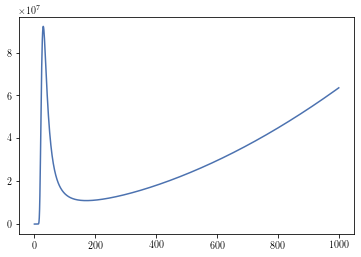

In [11]:
from scipy.stats import norm

mu_p = 20/1000
sigma_p = 5/1000
b = np.radians(30)

def z_pdf(z, b, parallax, parallax_error):
    return norm.pdf(np.sin(b)/z, loc=parallax, scale=parallax_error)*z**2/parallax_error/np.sin(b)**3

zweight = np.linspace(0.1, 1000, 1000)
plt.plot(zweight, z_pdf(zweight, b, mu_p, sigma_p))

  0%|          | 0/2327 [00:00<?, ?it/s]

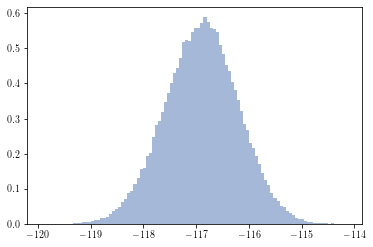

  0%|          | 1/2327 [00:00<35:29,  1.09it/s]

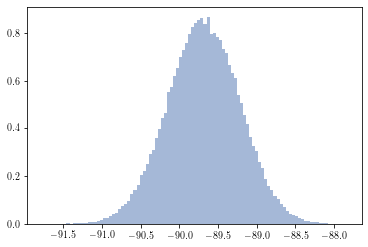

  0%|          | 2/2327 [00:01<33:12,  1.17it/s]

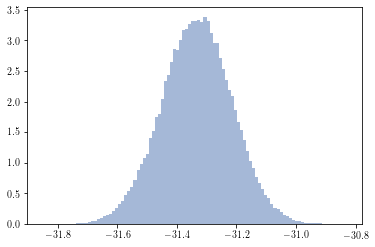

  0%|          | 3/2327 [00:02<30:21,  1.28it/s]

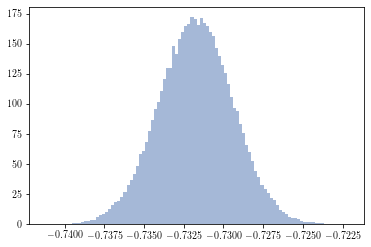

  0%|          | 3/2327 [00:03<41:14,  1.06s/it]


In [12]:
p = gaia['parallax'].to_numpy()/1000
p_err = gaia['e_parallax'].to_numpy()/1000
b = gaia['GLAT'].to_numpy()

def z_pdf_s(z, b, parallax, parallax_error):
    if b*z <= 0:
        return 0
    return norm.pdf(np.sin(b)/z, loc=parallax, scale=parallax_error)*z**2/parallax_error/np.sin(np.abs(b))**3
z_pdf = np.vectorize(z_pdf_s)
f = p_err/p


M = 100_000
zs = np.empty((len(p), M))

for i, (p_i, p_err_i, b_i) in enumerate(zip(p, p_err, tqdm(b))):
    f = p_err_i/p_i
    mode = 500
    delta = 100
    if f < 0.05:
        mode = 1/p_i*np.sin(np.abs(b_i))
        delta = p_err_i/p_i*mode
    zweight = np.linspace(mode-5*delta, mode+5*delta, 1000)
    if b_i < 0:
        zweight = -zweight
    pdf = z_pdf(zweight, b_i, p_i, p_err_i)
    pdf = pdf/pdf.max()
    mask = (pdf>1e-6)
    zweight = zweight[mask]
    pdf = pdf[mask]
    zweight = np.linspace(zweight.min(), zweight.max(), 1000)
    pdf = z_pdf(zweight, b_i, p_i, p_err_i)
    cdf = np.cumsum(pdf)
    cdf = cdf/cdf.max()
    inverse_cdf = interpolate.interp1d(cdf, zweight, fill_value='extrapolate', bounds_error=False)
    zs_i = inverse_cdf(np.random.rand(M))
    zs[i] = zs_i
    plt.hist(zs_i, bins=100, density=True, alpha=0.5)
    plt.show()
    if i > 2:
        break

run the above code in dedicated script

In [32]:
files = glob(join(data_dir, "*.npy"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(-0.10)_(0.13).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.13)_(0.19).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.19)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.27)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.33)_(0.36).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.36)_(0.38).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.38)_(0.40).npy']

In [33]:
index = 0
z_arr = np.load(files[index])
z_arr.shape

(3489, 10000)

(0.0, 1.0)

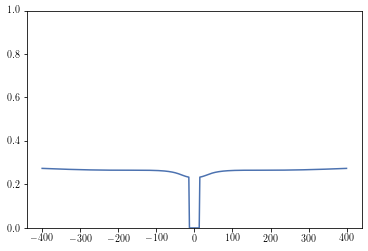

In [34]:
z = df_comp['z'].to_numpy()
frac = df_comp[str(index)].to_numpy()
compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

plt.plot(z, frac)
plt.ylim(0,1)

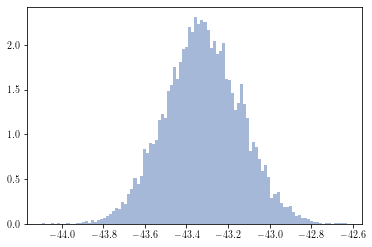

In [35]:
plt.hist(z_arr[1800], bins=100, density=True, alpha=0.5);

In [36]:
zb = np.max(z)
zmax = np.minimum(np.max(z_arr), zb)
zmin = np.maximum(np.min(z_arr), -zb)
zmax, zmin

(399.19839679358716, -399.19839679358716)

In [37]:
zl = np.floor(np.maximum(zmin, -zb))
zu = np.ceil(np.minimum(zmax, zb))
zedge = np.linspace(zl, zu, 20)

gaia = vaex.open(spec_files[index])
zs = gaia['z'].to_numpy()
znum, _ = np.histogram(zs, bins=zedge)
zmid = (zedge[1:] + zedge[:-1])/2
comp = compz(zmid)
mask = (comp > 0)*(znum>0)
znum = znum[mask]
zmid = zmid[mask]
zerr = np.sqrt(znum)

M = z_arr.shape[1]
znum_est = np.empty((M, len(znum)), dtype=int)
for i in tqdm(range(M)):
    z_realization = z_arr[:, i]
    znum_est_i = np.histogram(z_realization, bins=zedge)[0]
    znum_est[i] = znum_est_i[mask]

  4%|▍         | 403/10000 [00:00<00:02, 4027.30it/s]

100%|██████████| 10000/10000 [00:02<00:00, 4329.01it/s]


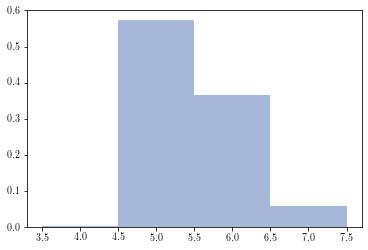

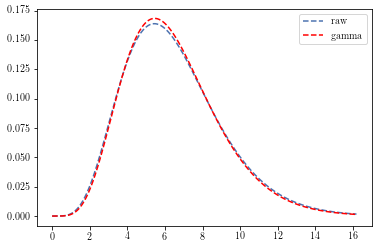

comp 0.272504346498155
[5.44972157]


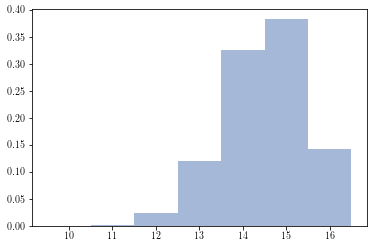

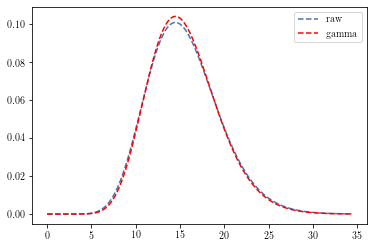

comp 0.26987077068940984
[14.47876483]


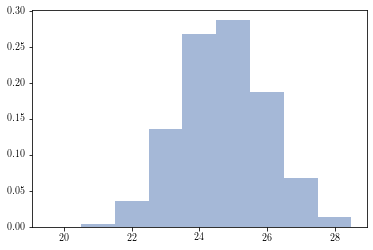

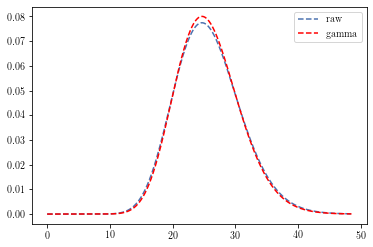

comp 0.26776748574894765
[24.67430036]


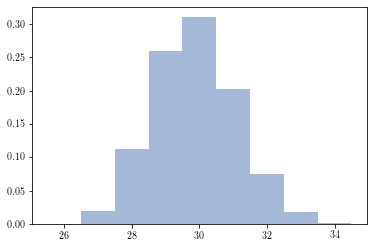

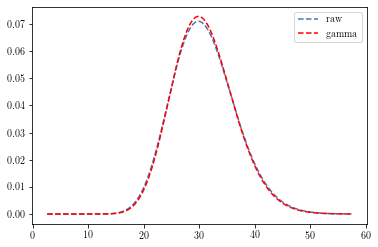

comp 0.2663158302683056
[29.84461577]


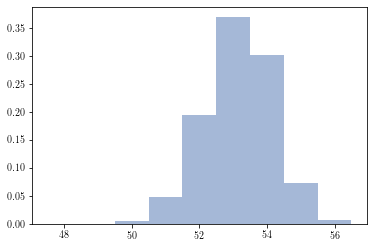

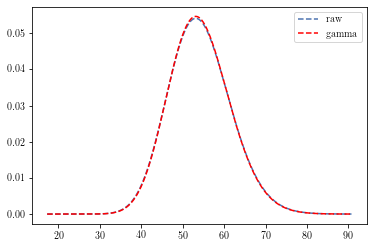

comp 0.2656018328050117
[53.14888587]


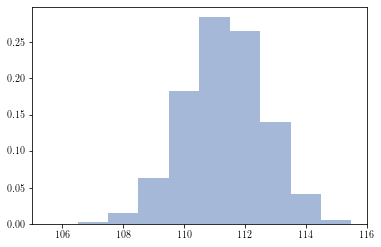

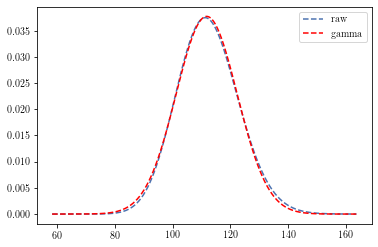

comp 0.265495092180867
[111.82214806]


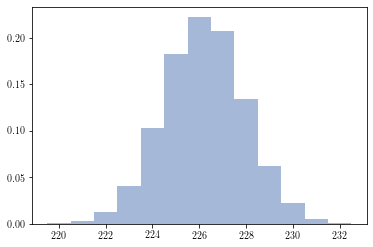

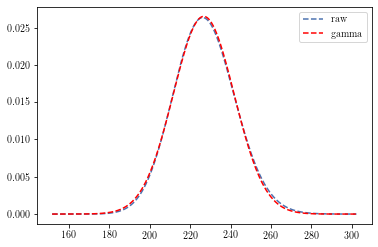

comp 0.265297866263216
[226.70515919]


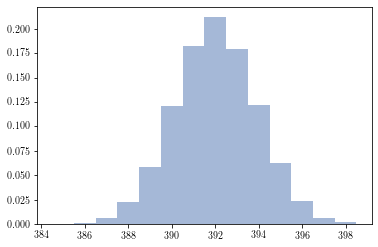

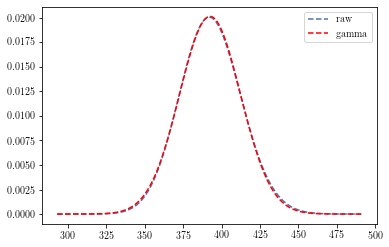

comp 0.26271456580665703
[392.51468525]


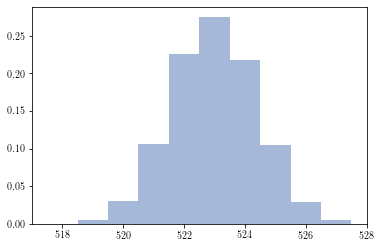

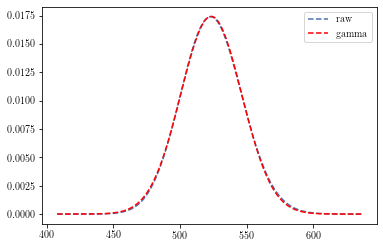

comp 0.24955133475356045
[523.47732364]


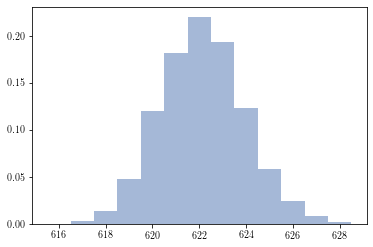

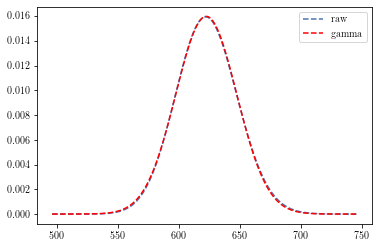

comp 0.24955133475356048
[622.62168681]


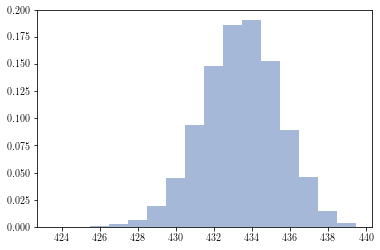

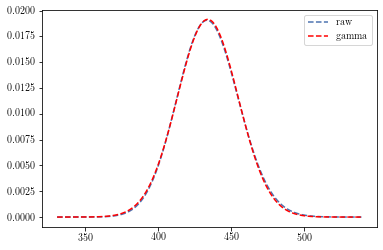

comp 0.2627145658066571
[433.94493359]


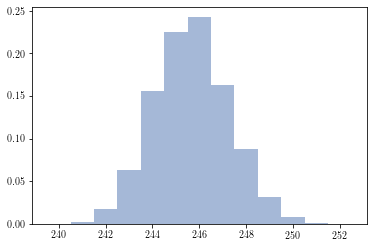

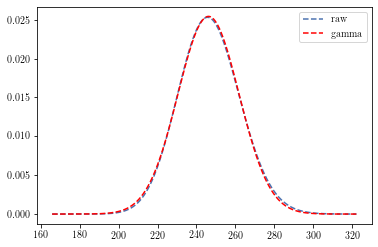

comp 0.265297866263216
[246.16438831]


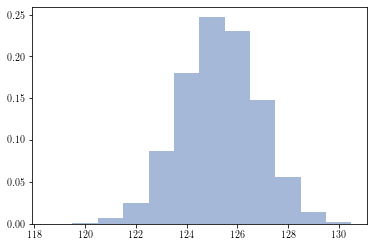

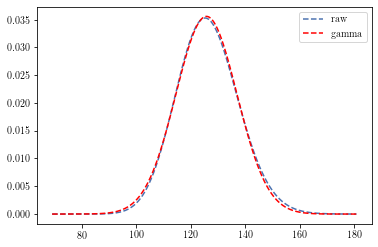

comp 0.265495092180867
[125.79473288]


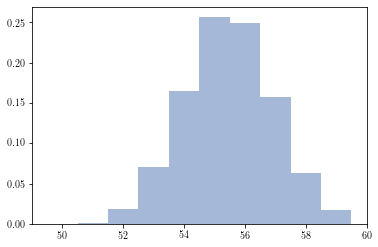

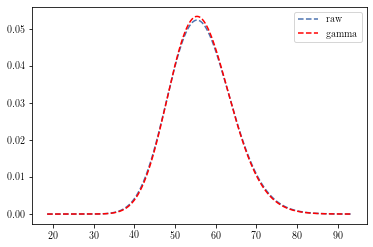

comp 0.2656018328050117
[55.4436977]


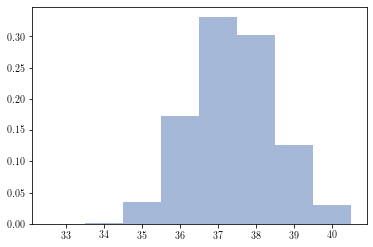

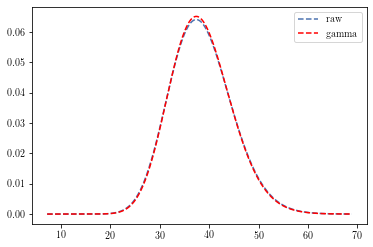

comp 0.2663158302683056
[37.38652462]


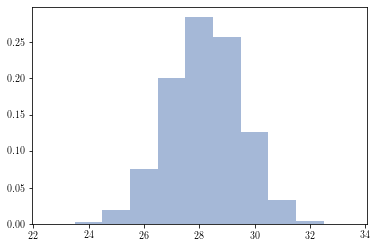

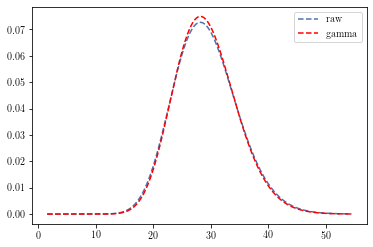

comp 0.26776748574894765
[28.18496857]


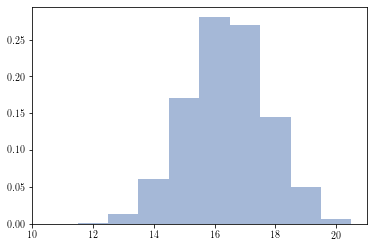

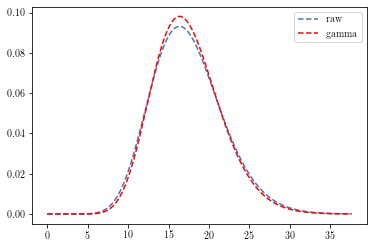

comp 0.26987077068940984
[16.36720387]


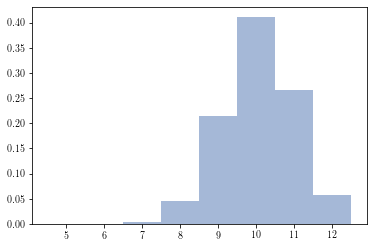

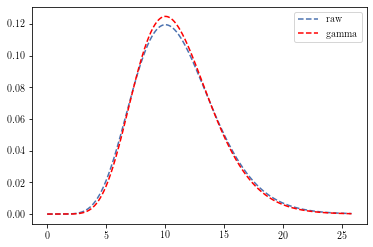

comp 0.272504346498155
[10.03527677]


In [38]:
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, loc=n, scale=np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

z_est = np.empty_like(znum, dtype=float)
z_comp = np.empty_like(znum, dtype=float)
for i in range(len(zmid)):
    # if i < 1:
    #     continue
    nz_min = np.floor(znum_est[:, i].min())
    nz_max = np.ceil(znum_est[:, i].max())
    bins = np.arange(nz_min-1/2, nz_max+1/2)
    zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
    ns = (n_edge[1:] + n_edge[:-1]) / 2
    mask = zweight > 0
    zweight = zweight[mask]
    ns = ns[mask]
    plt.bar(ns, zweight, width=1, alpha=0.5)
    plt.show()
    m = 5
    comp = compz(zmid[i])
    lambdas = np.linspace(np.maximum(0, znum[i]-m*np.sqrt(znum[i])), znum[i]+m*np.sqrt(znum[i]), 10_000)
    pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
    area = np.trapz(pn, lambdas)
    pn = pn / area
    popt_g, _ = curve_fit(p_approx, lambdas, pn, p0=[znum[i]])
    plt.plot(lambdas, pn, label='raw', ls="--")
    plt.plot(lambdas, p_approx(lambdas, *popt_g), label='gamma', ls="--", c='r')
    # plt.plot(lambdas_0, poisson.pmf(znum[i], lambdas_0), 'C1')
    plt.legend()
    plt.show()
    print("comp", comp)
    print(popt_g)
    z_est[i] = popt_g[0]
    z_comp[i] = comp
    # break

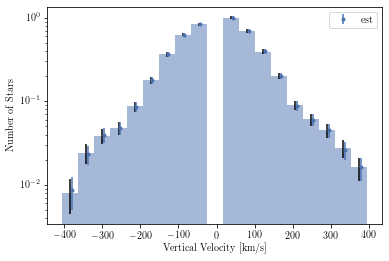

In [39]:
dz = np.min(np.diff(zedge))
plt.bar(zmid-5, znum/znum.max(), yerr=np.sqrt(znum)/znum.max(), width=dz, alpha=0.5)
plt.errorbar(zmid, z_est/z_est.max(), yerr=np.sqrt(z_est)/z_est.max(), fmt='.', label="est")
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.legend()
plt.yscale('log')
plt.show()

In [40]:
df = vaex.from_arrays(mid=zmid, num=z_est, com=z_comp)
df

#,mid,num,com
0,-378.9473684210526,5.44972156674828,0.272504346498155
1,-336.8421052631579,14.478764834903181,0.26987077068940984
2,-294.7368421052631,24.674300360700954,0.26776748574894765
3,-252.6315789473684,29.84461576968805,0.2663158302683056
4,-210.52631578947367,53.148885873119866,0.2656018328050117
...,...,...,...
13,210.5263157894737,55.44369769698463,0.2656018328050117
14,252.63157894736844,37.386524617702186,0.2663158302683056
15,294.73684210526324,28.184968571543973,0.26776748574894765
16,336.842105263158,16.367203865427022,0.26987077068940984


In [41]:
name = files[0].split("/")[-1].replace(".npy", ".hdf5").replace("gaia", "z")
name

'z_(-0.10)_(0.13).hdf5'

In [42]:
join(data_dir, name)

'/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/z_(-0.10)_(0.13).hdf5'

# all of them

In [43]:
files

['/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(-0.10)_(0.13).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.13)_(0.19).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.19)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.27)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.33)_(0.36).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.36)_(0.38).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.38)_(0.40).npy']

In [44]:
spec_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(-0.10)_(0.13).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.13)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.19)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.27)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.33)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.36)_(0.38).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.38)_(0.40).hdf5']

In [45]:
np.load(files[0])

array([[-203.34640984, -202.17710767, -203.31255673, ..., -203.27185433,
        -203.24296379, -202.31786022],
       [ -56.87562339,  -56.91281715,  -56.77288484, ...,  -56.81370532,
         -57.01134056,  -56.94685174],
       [ -56.84409486,  -56.86014283,  -56.85366196, ...,  -56.86924801,
         -57.0321951 ,  -56.73622583],
       ...,
       [ -76.09208842,  -74.78316796,  -75.96330092, ...,  -75.05889844,
         -75.45534287,  -75.5822637 ],
       [ -14.75544646,  -14.72123359,  -14.79829264, ...,  -14.81425121,
         -14.7717715 ,  -14.77226738],
       [  31.35227409,   31.27019014,   31.33563499, ...,   31.17725365,
          31.28008535,   31.39539441]])

0 /home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(-0.10)_(0.13).npy
reading big data...
done reading
generating


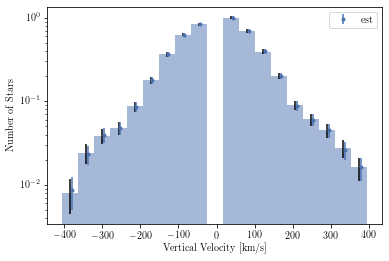

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 1 /home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.13)_(0.19).npy
reading big data...
done reading
generating


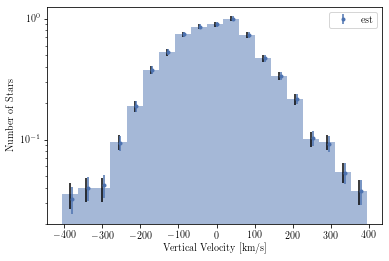

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 2 /home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.19)_(0.24).npy
reading big data...
done reading
generating


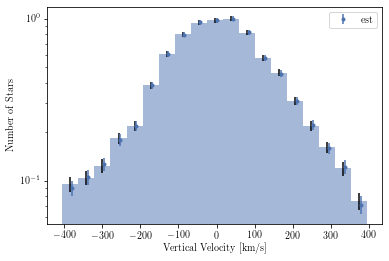

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 3 /home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.24)_(0.27).npy
reading big data...
done reading
generating


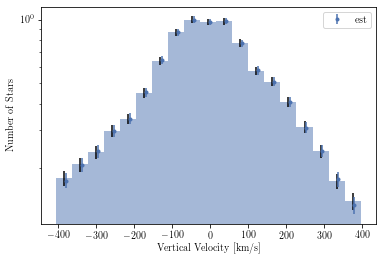

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 4 /home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.27)_(0.31).npy
reading big data...
done reading
generating


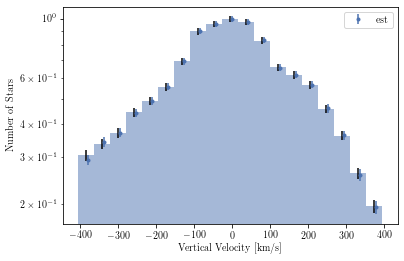

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 5 /home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.31)_(0.33).npy
reading big data...
done reading
generating


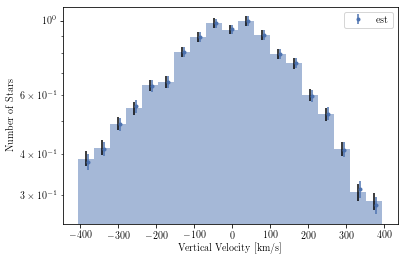

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 6 /home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.33)_(0.36).npy
reading big data...
done reading
generating


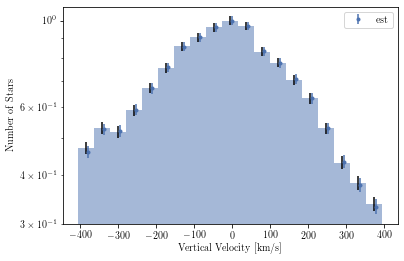

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 7 /home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.36)_(0.38).npy
reading big data...
done reading
generating


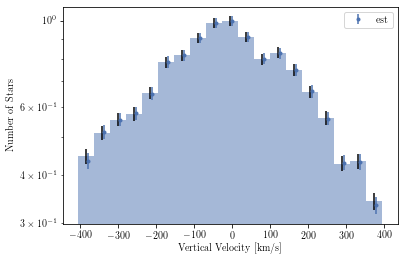

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 8 /home2/s20321005/Thesis-Project/Data/Vertical-Number-metal/gaia_(0.38)_(0.40).npy
reading big data...
done reading
generating


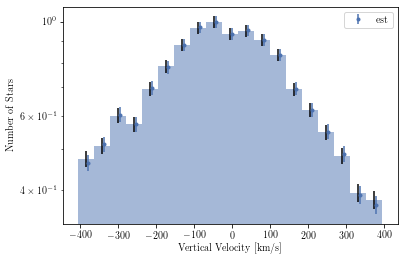

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

#,mid,num,com
0,-378.9473684210526,488.9927996212119,0.5294052401139273
1,-336.8421052631579,540.1138891908612,0.5364772431561212
2,-294.7368421052631,635.7638071164786,0.5439586919830142
3,-252.6315789473684,603.2320678104848,0.5513096099088955
4,-210.52631578947367,734.9002002631257,0.557632499042295
...,...,...,...
14,210.5263157894737,651.1506297063004,0.557632499042295
15,252.63157894736844,579.0751165806547,0.5513096099088954
16,294.73684210526324,513.6391531300858,0.5439586919830142
17,336.842105263158,409.69488732024655,0.5364772431561212


In [46]:
from scipy.interpolate import interp1d
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, loc=n, scale=np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

for index, file in enumerate(files):
    # if index < 8:
    #     continue
    print(index, file)
    print('reading big data...')
    z_arr = np.load(file)
    print('done reading')
    z = df_comp['z'].to_numpy()
    frac = df_comp[str(index)].to_numpy()
    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)
    zb = np.max(z)
    zmax = np.max(z_arr)
    zmin = np.min(z_arr)
    zl = np.floor(np.maximum(zmin, -zb))
    zu = np.ceil(np.minimum(zmax, zb))
    zedge = np.linspace(zl, zu, 20)

    gaia = vaex.open(spec_files[index])
    zs = gaia['z'].to_numpy()
    znum, _ = np.histogram(zs, bins=zedge)
    zmid = (zedge[1:] + zedge[:-1])/2
    comp = compz(zmid)
    mask = (comp > 0)*(znum>0)
    znum = znum[mask]
    zmid = zmid[mask]
    M = z_arr.shape[1]
    znum_est = np.empty((M, len(znum)), dtype=int)
    print("generating")
    for i in range(M):
        z_realization = z_arr[:, i]
        znum_est_i = np.histogram(z_realization, bins=zedge)[0]
        znum_est[i] = znum_est_i[mask]
    z_est = np.empty_like(znum, dtype=float)
    z_comp = np.empty_like(znum, dtype=float)
    for i in range(len(zmid)):
        nz_min = np.floor(znum_est[:, i].min())
        nz_max = np.ceil(znum_est[:, i].max())
        bins = np.arange(nz_min-1/2, nz_max+1/2)
        zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
        ns = (n_edge[1:] + n_edge[:-1]) / 2
        mask = zweight > 0
        zweight = zweight[mask]
        ns = ns[mask]
        m = 5
        comp = compz(zmid[i])
        lambdas = np.linspace(np.maximum(0, znum[i]-m*np.sqrt(znum[i])), znum[i]+m*np.sqrt(znum[i]), 10_000)
        pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
        area = np.trapz(pn, lambdas)
        pn = pn / area
        popt_g, _ = curve_fit(p_approx, lambdas, pn, p0=[znum[i]])
        z_est[i] = popt_g[0]
        z_comp[i] = comp
    dz = np.min(np.diff(zedge))
    plt.bar(zmid-5, znum/znum.max(), yerr=np.sqrt(znum)/znum.max(), width=dz, alpha=0.5)
    plt.errorbar(zmid, z_est/z_est.max(), yerr=np.sqrt(z_est)/z_est.max(), fmt='.', label="est")
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.legend()
    plt.yscale('log')
    plt.show()
    df = vaex.from_arrays(mid=zmid, num=z_est, com=z_comp)
    name = file.split("/")[-1].replace(".npy", ".hdf5").replace("gaia", "z")
    df.export(join(eff_dir, name), progress=True)
    # break
df

In [19]:
name = file.split("/")[-1].replace(".npy", ".hdf5").replace("gaia", "z")
name

'z_(0.38)_(0.40).hdf5'

In [45]:
name = file.split("/")[-1].replace(".npy", ".hdf5")
join(eff_dir, name)

'/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/gaia_(0.38)_(0.40).hdf5'